<a href="https://colab.research.google.com/github/KilovoIt/Jupyter-Notebooks/blob/main/Cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### *'If you cannot replicate it, you don't understand it'*

##### Run this cell below if you have any problems with displaying graphs in full height.

In [1]:
#@title

from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

# <font color='#00347C'>**Normal Distribution:**</font>

Normal distribution is called "normal" because it is the most frequent distribution of probabilities in nature. The distribution, unlike other simple math functions, has a very distinctive bell-curve shape. So what exactly does it tell us? Well, it is a probability distribution. Each point on the X-axis is bound to some function value which tells how likely is this X-value is to happen. In our example, there are no real data. Digits on the X-axis show how many standard deviations $\sigma$ the point is away from the mean of the population $\mu$.

The area under graph is equal to 1 and it makes sense, why: it's a summary of all probabilities of X totalling 100% for all possible outcomes. Red lines show different parts of the distribution and how much of the total probability it contains. Almost 70% of the data lies within one standard deviation both ways from the mean. 3 standard deviation each way contains 99.7% of the total probability, meaning there is almost nothing left. The mean has the probability of about 40% to happen.   

<IPython.core.display.Javascript object>

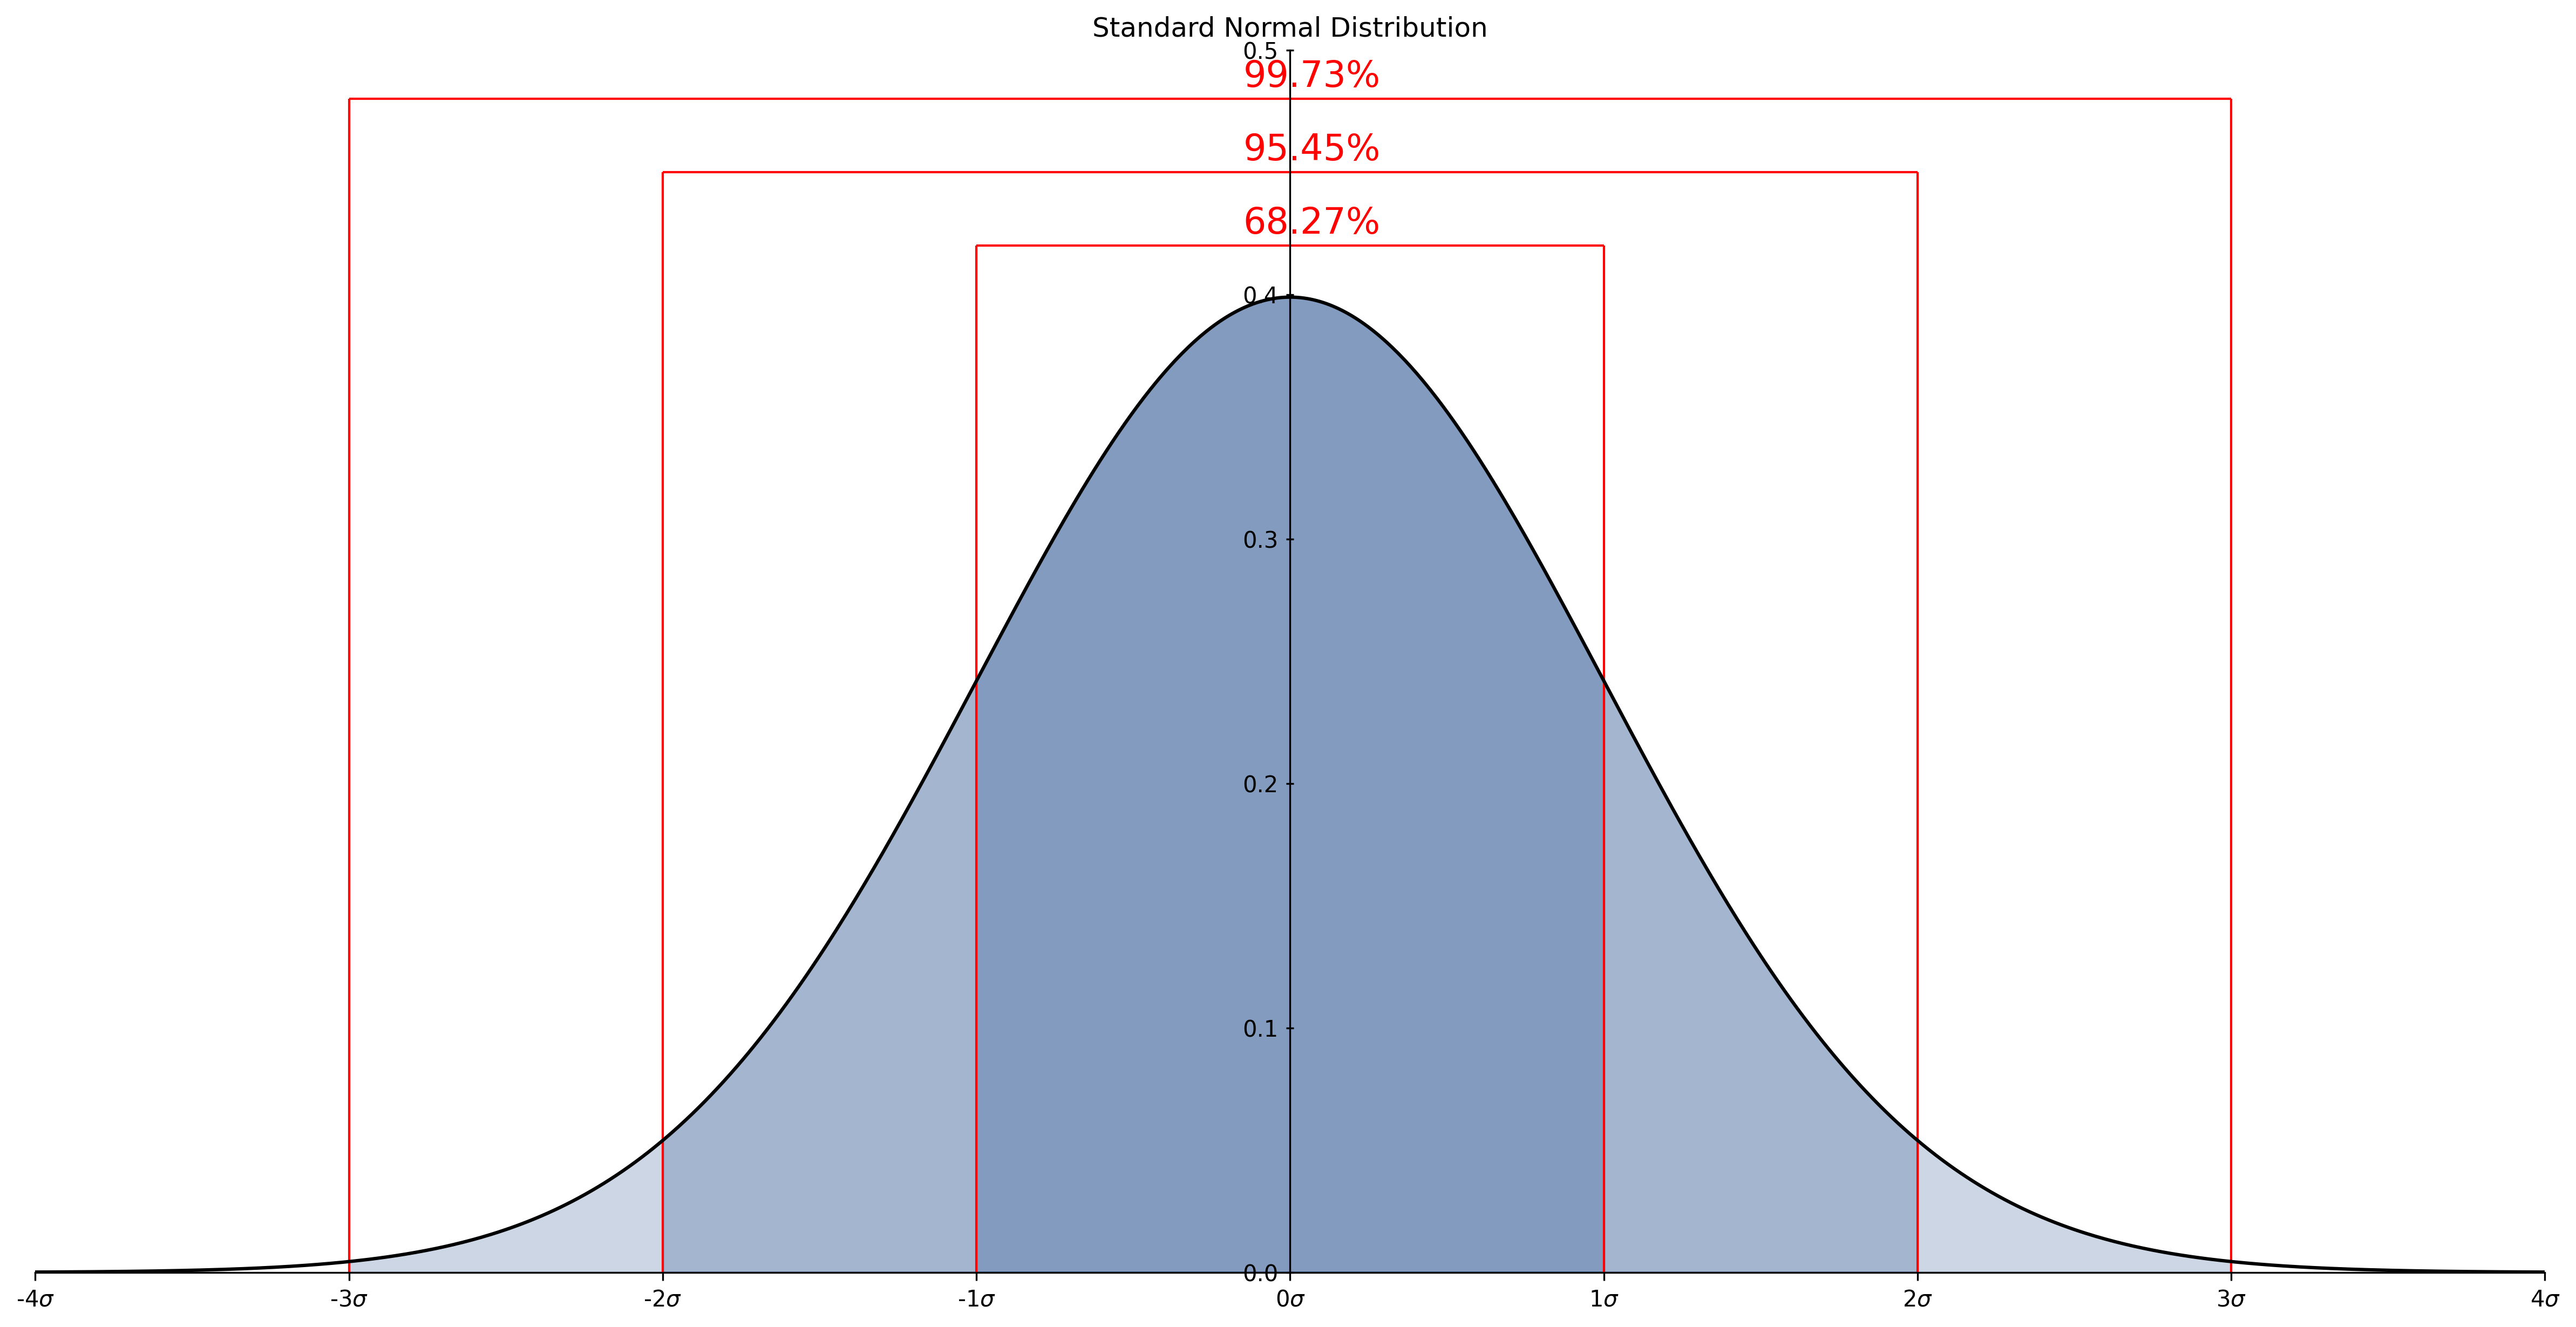

In [2]:
#@title

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import matplotlib.ticker as ticker

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)

fig = plt.figure(figsize=(20, 10), dpi=300)

ax = plt.subplot(111)
ax.plot(x, stats.norm.pdf(x, mu, sigma), color='Black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('center')
ax.tick_params(axis = 'y', direction='inout')
formatter = ticker.FormatStrFormatter(r'%1.0f$\sigma$')
ax.xaxis.set_major_formatter(formatter)

ax.set_ylim([0, 0.5])
ax.set_xlim([-4, 4])
#ax.fill_betweenx(stats.norm.pdf(x, mu, sigma), 0, x, color='DarkCyan')
ax.vlines([-1, 1], 0.0, .42, colors='r', lw=1)
ax.hlines(.42, -1, 1, colors='r', lw=1)
ax.fill_between(np.linspace(-1, 1, 1000), 
                stats.norm.pdf(np.linspace(-1, 1, 1000), mu, sigma),
                color='#00347C', alpha=0.2)
ax.text(-.15, 0.425, '68.27%', color='r', fontsize=16)

ax.vlines([-2, 2], 0.0, .45, colors='r', lw=1)
ax.hlines(.45, -2, 2, colors='r', lw=1)
ax.fill_between(np.linspace(-2, 2, 1000), 
                stats.norm.pdf(np.linspace(-2, 2, 1000), mu, sigma), 
                color='#00347C', alpha=0.2)
ax.text(-.15, 0.455, '95.45%', color='r', fontsize=16)

ax.vlines([-3, 3], 0.0, .48, colors='r', lw=1)
ax.hlines(.48, -3, 3, colors='r', lw=1)
ax.text(-.15, 0.485, '99.73%', color='r', fontsize=16)

ax.fill_between(np.linspace(-3, 3, 1000), 
                stats.norm.pdf(np.linspace(-3, 3, 1000), mu, sigma), 
                color='#00347C', alpha=0.2)
ax.set_title('Standard Normal Distribution')

plt.show()




# <font color='DarkGreen'>**Central Limit Theorem:**</font>

### Sufficiently large sample sizes will form approximately normal distribution of the sample means. 

This simulator takes a sample mean from the sample of **n** elements and repeats the procedure x1000, then the result is plotted on the right. Bigger **n** produces more normal-like distribution of the sample means. The bigger is **n**, the smaller is the $\sigma^2$ (Bell is getting tighter in the base). Also, it does not matter what the orginal distribution looks like, as long as it has a finite variance, large enough sample size will produce an approximately normal distribution of the sample means.

In [3]:

#@title

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import display


import random
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt

#This function prepares population distribution 
def DISTR(shape):
        
        if shape == 'Bimodal':
            mu = 0
            variance = 1
            sigma = math.sqrt(variance)
            
            x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
            y =  stats.norm.pdf(x, mu, sigma)

        elif shape == 'Uniform':
            y = []
            for i in range(1000):
                for k in range(50):
                    y.append(i)

        elif shape == 'Exponential':
            y = expon.pdf(np.linspace(expon.ppf(0.01),
                    expon.ppf(0.99), 1000))
            
        elif shape == 'Normal':
            y = np.random.normal(100, 5, 10000)

        return(y)

dist = []
for distribution in ['Normal', 'Bimodal', 'Exponential', 'Uniform']:
    dist.append(DISTR(distribution))


    

def CLT(n=100, dist=dist, shape='Normal'):
    sample_means = []

    if shape == 'Normal':
        y = dist[0]

    elif shape == 'Bimodal':
        y = dist[1]

    elif shape == 'Exponential':
        y = dist[2]

    else:
        y = dist[3]

    for i in range(1000):
        sample_means.append(np.mean(random.sample(list(y), n)))


    fig = plt.figure(figsize=(20, 10), dpi=300)

    ax0 = plt.subplot(121)
    ax0.hist(y, color='PaleGreen', bins=40, edgecolor='black', lw=1.2)
    ax0.set_title('Population distribution')
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)

    ax1 = plt.subplot(122)
    ax1.hist(sample_means, edgecolor='black', color='LightSkyBlue', bins=40)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_title(f'Distribution of the sample means, sample size of {n}')

    plt.suptitle("Central Limit Theorem")
    plt.show()



samp_size = widgets.IntSlider(min=1, max=100, step=1, continuous_update=False, value=1, description='sample size')
shape_pop = widgets.Dropdown(options=['Bimodal', 'Normal', 'Uniform', 'Exponential'], description='population:')
ui = widgets.HBox([samp_size, shape_pop])


out = widgets.interactive_output(CLT, {'n': samp_size, 'shape': shape_pop})
display(ui, out)


<IPython.core.display.Javascript object>

Output()

# <font color="#0047ab">**T-test**</font>

The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means) could have happened by chance. Is it just a coincidence? Or you result is statistically significant? 

The area below the curve, as we have established above, is the sum of the probabilities, and therefore it is equal to 1. First of all, we establish some treshold called '$\alpha$-level', or 'significance level'. This value is a part of the bell curve area in percentage, that we reserve to say that everything with the probability below that number is considered significant. It's *improbable* to happen just by chance (even though still possible!), and therefore everything that has area smaller than $\alpha$-level is considered statisticlaly significant.

Alongside with alpha-level, we make some assumptions about the sample(s) we took. The first assumption is called Null Hypothesis or $H_0$, and it allways tells that the means of two groups are equal, so $\mu==\bar{x}$ or $\bar{x_1} = \bar{x_2}$.
Alternative hypothesis states the opposite, that the means of two groups are not equal, so they are either differ in a specific direction (one less than or greater than another), or they are just not equal to each other. 



*T-test can be represented by a formula:*

t = $\frac{\overline{x}-\mu}{\frac{s}{\sqrt{n}}}$ for a one-sample t-test, and
t = $\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}}$ for an independent sample t-test. 

In both cases, we are getting back some value of **t**. This value determines how probable our results to happen naturally. If it is a one-taled t-test, we are comparing if $\mu$ can be either $\leq$ or $\geq$ than sample $\bar{x}$. If it's a two-taled t-test, we don't care which side do they differ, as long as $\mu \neq \bar{x}$. 

After getting a t-statistics, we can determine a p-value, which is essentially:

p = $\int_{t}^{\infty}pdf(t)dt$ if $\mu \geq \bar{x}$, or in simpler words, p is the area under the portion of the curve that is limited by **t** vertical line(s). 

Finally, we can compare p-value with $\alpha$-level. Is p-value bigger? Than we cannot reject the $H_0$, our aquired result is quite common and could have happened as an accident. Is it less than $\alpha$-level? Then it's not a coincidence, and we can reject the $H_0$.

In [4]:
#@title

## Basic T-Distribution
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import pandas as pd
from ipywidgets import widgets

### Describing all the necessary widgets
alpha_level = widgets.FloatSlider(min=0.01, max=0.99, step=0.01, description=u'\u03B1:', continuous_update=False)
n_of_tails = widgets.Dropdown(options=[('one-tailed', 1), ('two-tailed', 2)], description='tails:')
direction = widgets.Dropdown(options=[(u'\u00B5\u2264x\u0304','popmean<=sampmean'), (u'\u00B5\u2265x\u0304','popmean>=sampmean')])
tcrit_level = widgets.FloatSlider(min=-2.54, max=2.54, step=0.01, value=-2.54, description='t-crit:', continuous_update=False)
t_observed = widgets.FloatSlider(min=-2.54, max=2.54, step=0.01, value=-1.2, description='t-observed:', continuous_update=False) 


### Describing Handlers
def tcrit_handler(*args):
    dof=19
    n = n_of_tails.value
    if n == 1:
        if direction.value == 'popmean<=sampmean':
            tcrit_level.value=round(stats.t.ppf(alpha_level.value/1, dof), 2)
        else:
            tcrit_level.value=(-1) * round(stats.t.ppf(alpha_level.value/1, dof), 2)
    else:
        tcrit_level.value=-round(stats.t.ppf(alpha_level.value/2, dof), 2)


def alpha_handler(*args):
    dof=19
    if n_of_tails.value == 1:
        if direction.value == 'popmean<=sampmean':
            func = lambda x: stats.t.pdf(x, dof)
            result = integrate.quad(func, -tcrit_level.value, 5)
            result = result[0]
        else:
            func = lambda x:stats.t.pdf(x, dof)
            result = integrate.quad(func, tcrit_level.value, 5)
            result = result[0]
    else:
        func = lambda x:stats.t.pdf(x, dof)
        result = integrate.quad(func, tcrit_level.value, 5)
        result = result[0] * 2

    alpha_level.value = round(result, 2)


def t_handler(*args):
    if n_of_tails.value == 2:
        t_observed.max = 3
        t_observed.min = 0
        t_observed.value = 0.35

### Watch Functions
alpha_level.observe(tcrit_handler, 'value')
tcrit_level.observe(alpha_handler, 'value')
direction.observe(tcrit_handler, 'value')
n_of_tails.observe(t_handler, 'value')

### Describing the main function
def distrib(alpha, t_observed, n=1, tcrit_direction='popmean<=sampmean'):
    ## Setup      
    dof = 19       # Degrees of freedom
    #alpha = alpha    # Significence level
    ntails = n      # Number of tails 

    ## Calculate critical t-score
    tcrit = stats.t.ppf(alpha/ntails, dof)
    

    fig = plt.figure(figsize=(15, 8), dpi=200)
    xs = np.linspace(-5,5,1000)
    ax = plt.subplot(111) 
    ax.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF", color='#0047ab')
    ax.fill_between(xs, stats.t.pdf(xs,dof), color='#99D7EE', alpha=1)
    ax.set_ylim([0, 0.5])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title('T-distribution')
    ax.set_xlabel('t')
    ax.set_ylabel('probabilty density')


    
    if n == 2:
        plt.vlines([-tcrit, tcrit], 0.0, stats.t.pdf(tcrit, dof), colors='r')
        plt.vlines([-t_observed, t_observed], 0.0, stats.t.pdf(t_observed, dof), colors='#009AD5')
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<tcrit, color='#AA1839', alpha=.8, label=u'\u03B1')
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>-tcrit, color='#AA1839', alpha=.8)
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>t_observed, color='#0047AB', alpha = 0.5, label='p-value')
        ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<-t_observed, color='#0047AB', alpha = 0.5)
        
        
    ### Plotting the lines    
    elif n == 1:
        plt.vlines(t_observed, 0.0, stats.t.pdf(t_observed, dof), colors='#009AD5')
        
        if tcrit_direction == 'popmean<=sampmean':
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<t_observed, color='#0047AB', alpha=0.8, label='p-value')
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs<tcrit, color='#AA1839', alpha=0.8, label=u'\u03B1' )
            plt.vlines(tcrit, 0.0, stats.t.pdf(tcrit, dof), colors='r')

        else:
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>-tcrit, color='#AA1839', alpha=0.8, label=u'\u03B1')
            ax.fill_between(xs, stats.t.pdf(xs,dof), where=xs>t_observed, color='#0047AB', alpha=0.8, label='p-value')
            plt.vlines(-tcrit, 0.0, stats.t.pdf(tcrit, dof), colors='r')
    plt.legend()
    
    ### Making decision about accepting or rejecting the Null
    text_responses = [r'$\mathit{H}_0$ hypothesis is not rejected', r'$\mathit{H}_0$ hypothesis is rejected']
    text_kwargs = dict(ha='center', va='center', fontsize=14, color='DarkBlue')
    if ntails == 1:
        if tcrit_direction == 'popmean<=sampmean':  
            if tcrit<=t_observed:
                ax.text(0, .45, text_responses[0], **text_kwargs)
            else:
                ax.text(0, .45, text_responses[1], **text_kwargs)
        else:
            if -tcrit>=t_observed:
                ax.text(0, .45, text_responses[0], **text_kwargs)
            else:
                ax.text(0, .45, text_responses[1], **text_kwargs)
    else:
        if -tcrit>=t_observed:
            ax.text(0, .45, text_responses[0], **text_kwargs)
        else:
            ax.text(0, .45, text_responses[1], **text_kwargs)

    f = lambda x: stats.t.pdf(x, dof)
    if ntails == 1:
        if tcrit_direction == 'popmean<=sampmean':
            p = integrate.quad(f, -5, t_observed)
            p = p[0]
        else:
            p = integrate.quad(f, t_observed, 5)
            p = p[0]  
    else:
        p = integrate.quad(f, t_observed, 5)
        p = p[0] * 2

    ax.text(-4, .45, u'\u03B1:{}'.format(alpha))
    ax.text(-4, .435, 'p-value:{}'.format(round(p, 2)))


    plt.show()
    
    
    
    
caption = widgets.Label(value='Controls')    
ui = widgets.HBox([n_of_tails, direction, alpha_level, tcrit_level, t_observed])
out = widgets.interactive_output(distrib, {'alpha':alpha_level, 'n':n_of_tails, 'tcrit_direction':direction, 't_observed':t_observed})

display(caption,ui, out)




<IPython.core.display.Javascript object>

Label(value='Controls')

Output()

# <font color='#002456'>**The Law of Large Numbers:**</font>

as a sample size grows, its mean gets closer to the average of the whole population.

This simulator imitates **n** tosses of a fair 6-sided dice. Thus, results from 1 to 6 can be obtained. Because the dice is fair, the probability of getting each of the results should be $\frac{1}{6}$, and the mean should be $\frac{\sum_{n=1}^{6}}{6}$ = 3.5

Horizontal red line represents our expected value, 3.5. Dark blue line shows the mean after each trial. 

In [5]:
#@title

import numpy as np
from numpy import random
from IPython.display import clear_output
from ipywidgets import widgets
from IPython.display import display
from traitlets import traitlets 
import matplotlib.pyplot as plt


class LoadedButton(widgets.Button):
    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        self.add_traits(value=traitlets.Any(value))


generate = LoadedButton(description='generate', value=[], button_style='danger')
generate.style.button_color='#002456'
sample = widgets.IntSlider(min=1, max=1000, step=1, continuous_update=False,
                           description='n of trials:')
ui_lln = widgets.HBox([generate, sample])


    
def create_sample(a):
    samples = []
    averages = []
    for i in range(1000):
        samples.append(random.randint(1, 7))
        averages.append(sum(samples)/len(samples))

    a.value = averages

def main(n, **kwargs):
    if len(generate.value) != 0:
        pop = generate.value
        to_plot = pop[0:n]
        fig1 = plt.figure(figsize=(20, 10), dpi=300)
        ax3 = plt.subplot(111)

        ax3.plot(to_plot, color='#002456')
        ax3.plot([0, len(to_plot)], [3.5, 3.5], lw=0.8, color='r', alpha=0.7)
        ax3.set_ylim([1, 6])
        ax3.set_xlim([0, len(to_plot)])
        ax3.set_ylabel('average')
        ax3.set_xlabel('number of trials')
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.set_title('The Law of Large Numbers')
        plt.show()
    else:
        print("Start the simulation by generating a fresh sample. " 
        "Move the slider to see the graph.")


generate.on_click(create_sample)
out_lln = widgets.interactive_output(main, {'n':sample})

display(ui_lln, out_lln)



<IPython.core.display.Javascript object>

Output()

# <font color='#641220'>**Confidence Intervals**</font>

### A confidence interval displays the probability that a parameter will fall between a pair of values around the mean. Confidence intervals measure the degree of uncertainty or certainty in a sampling method.

Confidence interval of .95 contains true population mean in 95% of the cases. Sampling Error is the measurement of accuracy, where Margin of Error MOE is the measurement of the precision. The bigger is the sample size, the more precise [narrow] the sample confidence interval.

This simulator shows true population mean as a red dotted line and a population distribution on the top graph. By clicking 'Generate' you can construct one confidence interval, or you can construct 10 confidence intervals by clicking 'Generate x10'. Generated confidence intervals will be displayed on the graph below

**n** slider controls the sample size, 1-$\alpha$ is a confidence level control. Most of the confidence intervals are constructed with 95% or 99% level of confidence, 100% level of confidence will take span of the whole distribution. 

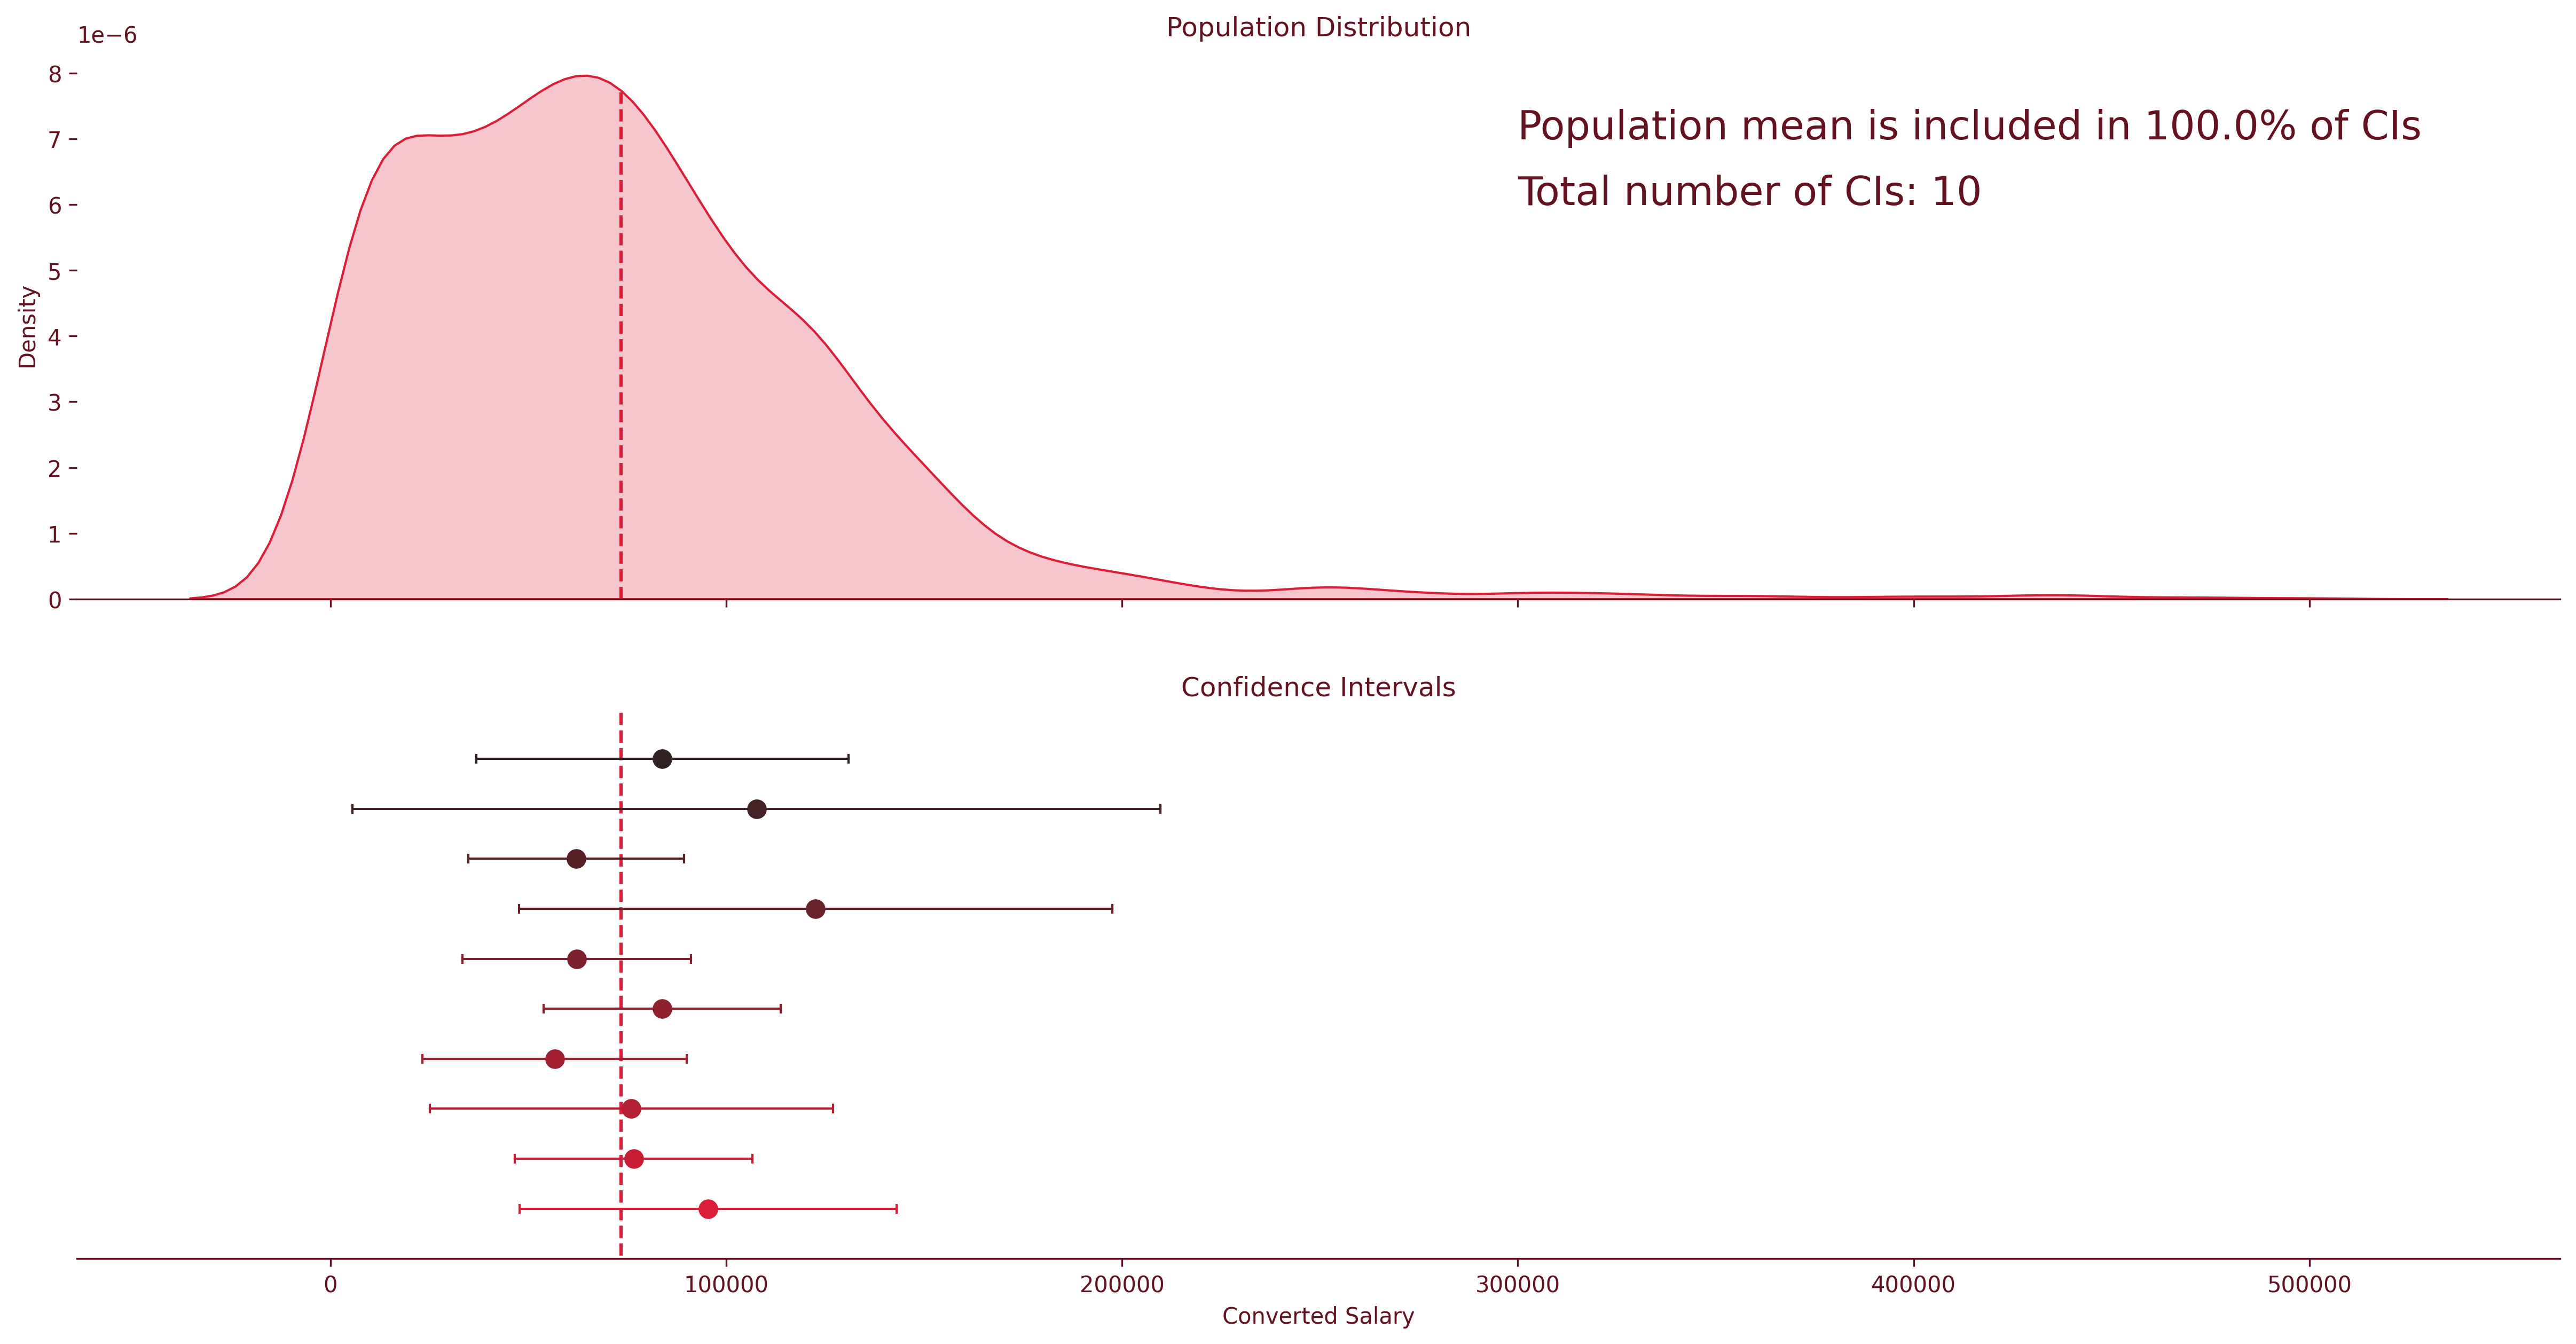

In [6]:
#@title

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import matplotlib.ticker as ticker
import seaborn as sns
from ipywidgets import widgets
from IPython.display import display, clear_output
import pandas as pd
from traitlets import traitlets
import scipy.stats as stats
import numpy as np
import matplotlib.ticker as ticker
import matplotlib

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

def confidence_interval(confidence, data):
    # Calculating confidence interval and MOE
    assert (confidence < 1 and confidence > 0), "Invalid Confidence Level"       
    mean = data.mean()
    n = len(data)
    stderr_mean = stats.sem(data)
    interval = stderr_mean * stats.t.ppf((1+confidence) / 2, n-1)
    return(mean-interval, mean, mean+interval, interval)


def ciDrawGUI(df=df):
    clear_output()
    #palette colors to be used:
    colors = ["#641220", "#6e1423", "#85182a", "#a11d33", "#a71e34", "#b21e35",
              "#bd1f36", "#c71f37", "#da1e37", "#e01e37"]
    
    #displaying UI interactive elements:
    display(widgets.HBox([generate_ci, generate_x10, clr, sample_size, confidence_level]))
    
    #drawing the plot:
    fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    fig.dpi = 300

    #distribution plot
    axs[0].set_title('Population Distribution', color='#641220')
    sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='#da1e37')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].vlines(df['ConvertedSalary'].mean(), 0, 7.71e-6, ls='--', color='#da1e37')
    axs[0].spines['left'].set_visible(False)
    axs[0].spines['bottom'].set_color('#641220')
    axs[0].spines['left'].set_color('#641220')
    axs[0].yaxis.label.set_color('#641220')
    axs[0].tick_params(axis='x', which='both', colors='#641220')
    axs[0].tick_params(axis='y', which='both', colors='#641220')
    
    #confidence intervals plot
    if len(generate_ci.memory) > 0:
        axs[1] = sns.pointplot(x=generate_ci.memory['ConvertedSalary'], 
                            y=generate_ci.memory['order'], 
                            errwidth=1, capsize=0.15, join=False, 
                            hue=generate_ci.memory['order'], 
                            palette=sns.dark_palette("#da1e37", 10, 
                                                     reverse=True))
        axs[1].get_legend().remove()
        #text output:
        axs[0].text(300000, 7e-6, 
                    'Population mean is included in '+f'{round(generate_ci.counter/(len(generate_ci.memory)/3)*100, 2)}% of CIs',
                    size=18, 
                    color='#641220')
        axs[0].text(300000, 6e-6, 
                    f'Total number of CIs: {round(len(generate_ci.memory)/3)}', 
                    size=18, 
                    color='#641220')
        
    axs[1].tick_params(axis='x', which='both', colors='#641220')
    axs[1].tick_params(axis='y', which='both', colors='#641220')
    axs[1].spines['left'].set_color('#641220')
    axs[1].spines['bottom'].set_color('#641220')
    axs[1].xaxis.label.set_color('#641220')
    axs[1].vlines(df['ConvertedSalary'].mean(), -2, 1000, ls='--', color='#da1e37')
    axs[1].set_ylim([-1, len(generate_ci.memory['order'])/3])
    axs[1].set_ylabel("")
    axs[1].tick_params(left=False, labelleft=False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].set_xlabel('Converted Salary')
    axs[1].set_title('Confidence Intervals', color='#641220')
    
    plt.show()


# describing the class inherited from widgets.Button that will hold our values:
class LoadedButton(widgets.Button):
    def __init__(self, memory, counter=0, value=0,  *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        self.add_traits(value=traitlets.Any(value))
        self.memory = memory
        self.counter = counter

#describing GUI interactive elements:
confidence_level = widgets.FloatSlider(min=0.01, max=.99, step=0.01, value=0.95, description=u'1-\u03B1')
sample_size = widgets.IntSlider(min=10, max=100, description='n')
generate_ci = LoadedButton(description='generate', memory=pd.DataFrame(), button_style='danger')
generate_ci.style.button_color='#a71e34'
clr = widgets.Button(description='clear', button_style='danger')
clr.style.button_color='#641220'
generate_x10 = widgets.Button(description='generate x10', button_style='danger')
generate_x10.style.button_color='#a71e34'



def erase():
    #eraser function. Clears all the memory params and returns empty graph
    generate_ci.counter = 0
    generate_ci.memory = pd.DataFrame()
    clear_output()
    display(widgets.HBox([generate_ci, generate_x10, clr, sample_size, confidence_level]))
    fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
    #distribution plot
    axs[0].set_title('Population Distribution', color='#641220')
    sns.kdeplot(x=df['ConvertedSalary'], fill=True, ax=axs[0], color='#da1e37')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].vlines(df['ConvertedSalary'].mean(), 0, 7.71e-6, ls='--', color='#da1e37')
    axs[0].spines['left'].set_visible(False)
    #confidence intervals plot
    #axs[1] = sns.pointplot(x=generate_ci.memory['measurements'], y=generate_ci.memory[0], errwidth=1, capsize=0.02, join=False, hue=generate_ci.memory[0])
    axs[1].vlines(df['ConvertedSalary'].mean(), 0, 5, ls='--', color='#da1e37')
    axs[1].tick_params(left=False, labelleft=False)
    axs[1].set_xlabel('ConvertedSalary', color='#641220')
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].set_title('Confidence Intervals', color='#641220')

def on_click_clear(b):
    #clear handler
    erase()


def on_click_generate(b, df=df):
    #generate handler
    matplotlib.pyplot.rcdefaults()

    generate_ci.value = int(generate_ci.value)
    generate_ci.value+=1
    generate_ci.value = str(generate_ci.value)

    lower, mean, upper, moe = confidence_interval(confidence_level.value, df['ConvertedSalary'].sample(n=sample_size.value, replace=True))
    
    if df.ConvertedSalary.mean() >= lower and df.ConvertedSalary.mean() <= upper:
        generate_ci.counter+=1
    
    conf_int = [lower, mean, upper]
    conf_int = pd.DataFrame({'ConvertedSalary':conf_int})
    
    
    addition = (pd.concat([conf_int, pd.DataFrame({'order': [generate_ci.value]*len(conf_int)})], axis=1))
    generate_ci.memory = pd.concat([addition, generate_ci.memory]).reset_index(drop = True)


    
    ciDrawGUI()



def on_click_x10(b, df=df):
    #generate x10 handler
    
    for i in range(10):
        generate_ci.value = int(generate_ci.value)
        generate_ci.value+=1
        generate_ci.value = str(generate_ci.value)

        lower, mean, upper, moe = confidence_interval(confidence_level.value, df['ConvertedSalary'].sample(n=sample_size.value, replace=True))
        if df.ConvertedSalary.mean() >= lower and df.ConvertedSalary.mean() <= upper:
            generate_ci.counter+=1
        
        conf_int = [lower, mean, upper]
        conf_int = pd.DataFrame({'ConvertedSalary':conf_int})
    
    
        addition = (pd.concat([conf_int, pd.DataFrame({'order': [generate_ci.value]*len(conf_int)})], axis=1))
        generate_ci.memory = pd.concat([addition, generate_ci.memory]).reset_index(drop = True)


    ciDrawGUI()

    
generate_ci.on_click(on_click_generate)
clr.on_click(on_click_clear)
generate_x10.on_click(on_click_x10)

erase()


# <font color='#036666'>**$\chi^2$ testing**</font>

### A chi-square test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another

Chi-square testing is used on categorical data. In a way, the concept of area under the curve and the probability is similar to one in T-tests. The only difference is that $\chi^2$ distribution is very sensitive to degrees of freedom and changes its shape.

First, we establish some significance level and make Null hypothesis 
$H_0$ and alternative hypothesis $H_a$.

$H_0$ states that there is no correlation between two groups, where $H_a$ states that there is a dependency.

By running the test and obtaining a $\chi^2$, we can figure out the p-value. If p-value is lesser than alpha, that means the result is statistically significant, and there is a dependency between two groups. Otherwise - we cannto reject the $H_0$/  

In [7]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from ipywidgets import widgets
from IPython.display import display
import scipy.integrate as integrate
from sympy import Symbol, Derivative

# Instantiating UI
dfr = widgets.IntSlider(min=1, max=30, value=4, description='dof:',
                        couninous_update=False)
chi_crit = widgets.FloatSlider(min=0, max=60, value=5, description='Χ-squared',
                               countinuous_update=False )
a_level = widgets.FloatSlider(min=0.01, max=0.99, value=0.05, step=0.01,
                              description=u'\u03B1:', countinuous_update=False)

def chi_square(dof, chi, alpha):
#x-axis ranges from 0 to 60 with .001 steps
    x = np.arange(0, 60, 0.001)

    #plot Chi-square distribution with <drf.value> degrees of freedom
    fig_chisq = plt.figure(figsize=(20, 10), dpi=300)
    ax_chi = plt.subplot(111)
    ax_chi.plot(x, chi2.pdf(x, dof), color='#036666')
    ax_chi.fill_between(x, chi2.pdf(x, dof), color='#99e2b4')
    ax_chi.spines['top'].set_visible(False)
    ax_chi.spines['right'].set_visible(False)
    ax_chi.set_title(r'$\chi^2$ distribution', color='#036666')
    ax_chi.spines['bottom'].set_color('#036666')
    ax_chi.spines['left'].set_color('#036666')
    ax_chi.xaxis.label.set_color('#036666')
    ax_chi.yaxis.label.set_color('#036666')
    ax_chi.tick_params(axis='x', which='both', colors='#036666')
    ax_chi.tick_params(axis='y', which='both', colors='#036666')

    #finding p-value by integrating the area under chi2.pdf():
    integral = lambda x: chi2.pdf(x, dof)
    probability = integrate.quad(integral, chi, 60)[0]
    chi_text = r'$\chi^2$'+f'({dof}) = {chi}'
    chi_text_p = f'p-value: {round(probability, 3)}'
    
    #finding the corresponding chi-squared for certain alpha level by iteration
    row = [0, 10, 20, 30, 40, 50, 60]
    for i, number in enumerate(row):
        if integrate.quad(integral, number, 60)[0] > alpha:
            pass
        elif integrate.quad(integral, number, 60)[0] < alpha:
            for k in np.arange(row[i-1], row[i], 0.1):
                if integrate.quad(integral, k, 60)[0] <= alpha:
                    alpha_line = k
                    break
            break
    #plotting alpha
    ax_chi.vlines(alpha_line, 0, chi2.pdf(alpha_line, dof), color='red')
    ax_chi.fill_between(x, chi2.pdf(x, dof), where=x>alpha_line, color='red', alpha=0.3)
    
    #plotting p-value and obtained chi-square:
    ax_chi.fill_between(x, chi2.pdf(x, dof), where=x>chi, color='#248277')
    ax_chi.vlines(chi, 0, chi2.pdf(chi, dof), color='#56ab91')
    
    #making a decision based on p-value and alpha:
    rejection = (r'$\mathit{H}_0$ is not rejected', r'$\mathit{H}_0$ is rejected')[alpha >= probability]

    #text-on-plot output
    if dof <=4:
        ax_chi.set(ylim=(0, 0.6), xlim=(0, 20))
        ax_chi.text(5, 0.3, chi_text, size=15, color='#036666')
        ax_chi.text(5, 0.28, chi_text_p, size=15, color='#036666')
        ax_chi.text(5, 0.26, r'$\alpha$: {}'.format(alpha), size=15, color='#036666')
        ax_chi.text(5, 0.24, rejection, size=15, color='#036666')
    elif dof <=10:
        ax_chi.set(ylim=(0, 0.20), xlim=(0, 40))
        ax_chi.text(15, 0.125, chi_text, size=15, color='#036666')
        ax_chi.text(15, 0.115, chi_text_p, size=15, color='#036666')
        ax_chi.text(15, 0.105, r'$\alpha$: {}'.format(alpha), size=15, color='#036666')
        ax_chi.text(15, 0.095, rejection, size=15, color='#036666')
    else:
        ax_chi.set(ylim=(0, 0.10), xlim=(0, 60))
        ax_chi.text(30, 0.08, chi_text, size=15, color='#036666')
        ax_chi.text(30, 0.075, chi_text_p, size=15, color='#036666')
        ax_chi.text(30, 0.070, r'$\alpha$: {}'.format(alpha), size=15, color='#036666')
        ax_chi.text(30, 0.065, rejection, size=15, color='#036666')

    
    # labeling axis
    ax_chi.set_xlabel(r'$\chi^2$')
    ax_chi.set_ylabel('probability density')
    plt.show()

    

ui_chi = widgets.HBox([dfr, chi_crit, a_level])
out_chi = widgets.interactive_output(chi_square, {'dof':dfr, 'chi':chi_crit, 'alpha':a_level})
#final display
display(ui_chi, out_chi)



<IPython.core.display.Javascript object>

Output()